## Genomics and High-Dimensional Data: Written Analysis, Peer Review and Discussion

### Problem 3

The hyper-parameter choices used in data analysis techniques can have a large impact on the inferences made. As you may have encountered, finding the best choice of parameter such as perplexity in T-SNE or the number of clusters can be an ambiguous problem. We will now investigate the sensitivity of your results to changes in these hyper-parameters, with the goal of understanding how your conclusions may vary depending on these choices.




In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, StratifiedKFold

1. (3 points) When we created the T-SNE plot in Problem 1, we ran T-SNE on the top 50 PC's of the data. But we could have easily chosen a different number of PC's to represent the data. Run T-SNE using 10, 50, 100, 250, and 500 PC's, and plot the resulting visualization for each. What do you observe as you increase the number of PC's used?

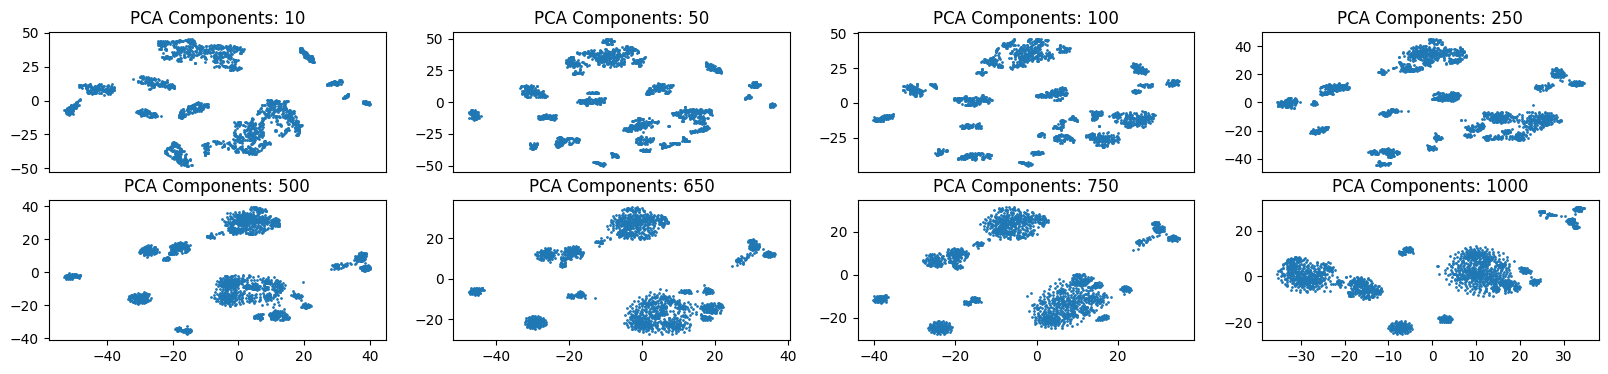

In [12]:
# Load the unsupervised learning data
dataset = np.load("./data/p2_unsupervised/X.npy")

# Take the log2 transform of the data
dataset = np.log2(dataset + 1)

# List the number of principal components to use for each of the tests
n_components = [10, 50, 100, 250, 500, 650, 750, 1000]

# Perform PCA on the data for each of the number of components
pca_fits = [
    PCA(n_components=n).fit(dataset) for n in n_components
]

# Create a figure with as many subplots as there are PCA fits and two rows
fig, axes = plt.subplots(2, int(len(n_components)/2), figsize=(20, 4))

# Generate 1 plot with 5 subplots, one for the result of a TSNE fit for 
# each of the PCA results
for i, pca_fit in enumerate(pca_fits):

    # Perform a TSNE fit on the PCA transformed data
    tsne_model = TSNE(n_components=2, perplexity=40) 
    tsne_fit = tsne_model.fit(pca_fit.transform(dataset))

    # Plot the TSNE fit on either the first or second row of subplots
    # depending on the index of the PCA fit. Disable the x-axis ticks
    # for all but the bottom row of subplots
    if i < len(n_components)/2:
        ax = axes[0, i]
        ax.set_xticks([])
    else:
        ax = axes[1, i - int(len(n_components)/2)]
    
    # Plot the TSNE fit
    ax.scatter(
        tsne_fit.embedding_[:, 0], 
        tsne_fit.embedding_[:, 1], 
        s=1
    )
    ax.set_title(f"PCA Components: {n_components[i]}")

# Show the plot
plt.show()


- From running the script multiple times, it was made apparent that the more PC's used, the more the data points begin to get clumped into a lower number of distinct clusters. This was made even more evident by including new plots for 650, 750 and 1000 PC's. In the lower range of clusters, clusters still emerge, but they are more numerous and with a higher number of surrounding little islands. As the number of PC's increases, the clusters become less sparse until they reach a point where they have a very distinct shape that does not change much as the PC's continue to increase. 

   This may be caused by the fact that the data keeps using the same set of main principal components to represent the "core" of the data, but as the PC's get higher, more and more of the variance gets captured in the final clustering, until a "sweet-spot" gets reached where the addition of more PC's is just helping with including outliers in the existing clusters.

2. (13 points) Pick three hyper-parameters below (the 3 is the total number that a report needs to analyze. It can take a) 2 from A, 1 from B, or b) 1 from A, 2 from B.) and analyze how changing the hyper-parameters affect the conclusions that can be drawn from the data. Please choose at least one hyper-parameter from each of the two categories (visualization and clustering/feature selection). At minimum, evaluate the hyper-parameters individually, but you may also evaluate how joint changes in the hyper-parameters affect the results. You may use any of the datasets we have given you in this project. For visualization hyper-parameters, you may find it productive to augment your analysis with experiments on synthetic data, though we request that you use real data in at least one demonstration.

   Some possible choices of hyper-parameters are:

   **Category A (visualization):**

   - T-SNE perplexity
   - T-SNE learning rate
   - T-SNE early exaggeration
   - T-SNE initialization
   - T-SNE number of iterations/convergence tolerance

   **Category B (clustering/feature selection):**

   - Effect of number of PC's chosen on clustering
   - Type of clustering criterion used in hierarchical clustering (single linkage vs ward, for example)
   - Number of clusters chosen for use in unsupervised feature selection and how it affects the quality of the chosen features
   - Magnitude of regularization and its relation to your feature selection (for example, does under or over-regularizing the model lead to bad features being selected?)
   - Type of regularization (L1, L2, elastic net) in the logistic regression step and how the resulting features selected differ
   - For visualization hyper-parameters, provide substantial visualizations and explanation on how the parameter affects the image.
   - For clustering/feature selection, provide visualizations and/or numerical results which demonstrate how different choices affect the downstream visualizations and feature selection quality.
   - Provide adequate explanations in words for each of these visualizations and numerical results.